In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [4]:
crop = pd.read_csv("data/Crop_recommendation.csv")

Head of the dataset:


,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice



Shape of the dataset: (2200, 8)

Info of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB
None

Checking for missing values:
N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

Checking for duplicates:
0

Summary statistics:


,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117



Correlation matrix:


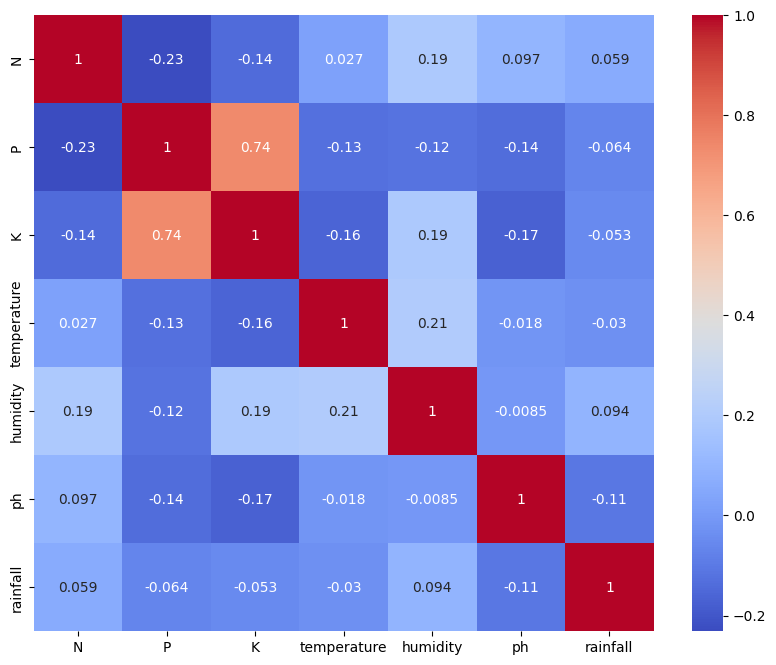

In [5]:
def explore_data(data):
    print("Head of the dataset:")
    display(data.head())
    print("\nShape of the dataset:", data.shape)
    print("\nInfo of the dataset:")
    print(data.info())
    print("\nChecking for missing values:")
    print(data.isnull().sum())
    print("\nChecking for duplicates:")
    print(data.duplicated().sum())
    print("\nSummary statistics:")
    display(data.describe())
    print("\nCorrelation matrix:")
    numeric_data = data.select_dtypes(include=[np.number])  # Select only numeric columns
    corr = numeric_data.corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr, annot=True, cbar=True, cmap='coolwarm')
    plt.show()

explore_data(crop)

In [6]:
crop_dict = {
    'rice': 1, 'maize': 2, 'jute': 3, 'cotton': 4, 'coconut': 5, 'papaya': 6, 'orange': 7,
    'apple': 8, 'muskmelon': 9, 'watermelon': 10, 'grapes': 11, 'mango': 12, 'banana': 13,
    'pomegranate': 14, 'lentil': 15, 'blackgram': 16, 'mungbean': 17, 'mothbeans': 18,
    'pigeonpeas': 19, 'kidneybeans': 20, 'chickpea': 21, 'coffee': 22
}
crop['crop_num'] = crop['label'].map(crop_dict)
X = crop.drop(['crop_num', 'label'], axis=1)
y = crop['crop_num']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
ms = MinMaxScaler()
sc = StandardScaler()
X_train_scaled = sc.fit_transform(ms.fit_transform(X_train))
X_test_scaled = sc.transform(ms.transform(X_test))

In [7]:
models = {
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}
results = {}

for name, model in models.items():
    scores = cross_val_score(model, X_train_scaled, y_train, cv=5)
    mean_score = np.mean(scores)
    results[name] = mean_score

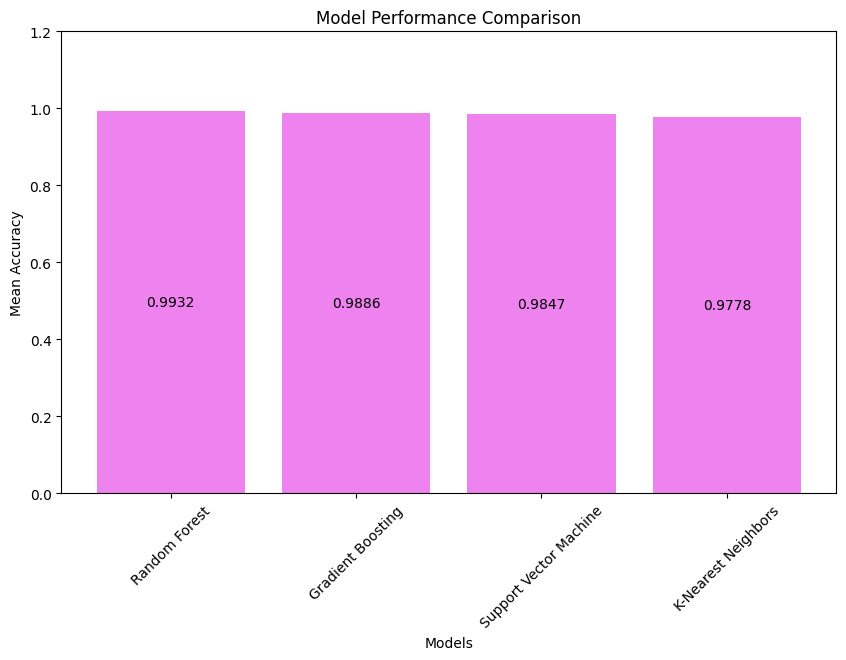

In [8]:
plt.figure(figsize=(10, 6))
bars = plt.bar(results.keys(), results.values(), color='violet')
plt.title('Model Performance Comparison')
plt.xlabel('Models')
plt.ylabel('Mean Accuracy')
plt.ylim(0, 1.2)
plt.xticks(rotation=45)

# Adding text annotations inside each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height / 2, f'{height:.4f}', ha='center', va='center')

plt.show()


In [ ]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

rf = RandomForestClassifier()
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

In [10]:
#Retraining with best model
best_model.fit(X_train_scaled, y_train)
ypred = best_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, ypred)
print("Accuracy after hyperparameter tuning:", accuracy)

Accuracy after hyperparameter tuning: 0.9931818181818182


In [11]:
with open('best_model.pkl', 'wb') as model_file:
    pickle.dump(best_model, model_file)
with open('standscaler.pkl', 'wb') as scaler_file:
    pickle.dump(sc, scaler_file)
with open('minmaxscaler.pkl', 'wb') as minmax_file:
    pickle.dump(ms, minmax_file)